# Load data

In [34]:
import pandas as pd

In [35]:
#activities
residual_800 = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/data/residuals_800_q.csv')

In [36]:
#questions
x_train_800 = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/data/X_train_800.csv')

In [37]:
residual_800.head()

,activity,q_num,rank,score,userid
0,answer,0,1,1.234562,571407
1,comment,0,3952,0.120353,1381767
2,comment,0,1,1.234562,571407
3,comment,0,2840,0.206159,1292401
4,comment,0,2821,0.208532,1025201


# FInd outliers

In [38]:
import numpy as np

In [39]:
def outliers(li):
    qua1, qua3 = np.percentile(li, [25, 75])
    iqr = qua3 - qua1
    upper_bound = qua3 + (iqr * 1.5)
    li_outlier = [i for i in li if i >= upper_bound]
    return li_outlier

In [40]:
outlier_rank = outliers(list(residual_800['rank']))

In [41]:
#dataframe with outliers
activities_outliers = residual_800[residual_800['rank'].isin(outlier_rank)]

# Proportion of each activities in outliers

In [42]:
import matplotlib.pyplot as plt

In [43]:
activities_outliers.activity.value_counts()

answer      219
favorite     97
edit         43
comment      30
Name: activity, dtype: int64

# Questions of these observed outlier ranks

In [44]:
outlier_question = x_train_800[x_train_800.index.isin(activities_outliers.q_num.unique())]

In [45]:
outlier_question.head()

,Unnamed: 0,Unnamed: 0.1,Id,ParentId,AcceptedAnswerId,CreationDate,Score,ViewCount,Body,OwnerUserId,OwnerDisplayName,LastEditorUserId,Title,Tags,AnswerCount,CommentCount,FavoriteCount,ClosedDate
2,2,67737,11209935,NaN,NaN,2012-06-26T14:46:59.163,2,10504.0,<p>I 'm getting the date in the following form...,964819.0,NaN,904049.0,Changing one date format to another,java date format,4.0,1,NaN,NaN
13,13,1296,8741054,NaN,8741143.0,2012-01-05T10:37:18.253,0,1732.0,<p>How to resolve warning message coming in ec...,374199.0,NaN,1977903.0,Eclipse Warning message,java eclipse,5.0,6,0.0,NaN
14,14,43834,10314404,NaN,10314451.0,2012-04-25T11:09:04.190,-2,2842.0,<p>I am working on Galaxy Nexus(Android 4.0.3)...,896579.0,NaN,136445.0,How to save captured image to gallery,java android emulation samsung-mobile,2.0,1,NaN,NaN
23,23,68460,11239086,NaN,11239128.0,2012-06-28T06:23:16.197,132,291504.0,<blockquote>\r\r\r\n <p><strong>Possible Dupl...,1439243.0,NaN,-1.0,java.lang.UnsupportedClassVersionError Unsuppo...,java,7.0,0,33.0,2013-02-04T07:29:18.850
24,24,20678,9484820,NaN,NaN,2012-02-28T15:33:14.167,-1,1488.0,<p>I have an html file called basic.html and w...,1178770.0,NaN,1400768.0,Regex - find various strings from an HTML file,java html regex,2.0,4,NaN,2014-09-27T14:44:12.220


In [46]:
y_train = pd.read_csv('/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/data/y_train.csv')

# map activity for feature matrix (question number)

In [84]:
def map_activity(file_name):
    """ Modify Feature Matrix (Ranks of users for each question) to add activities.
    
    Argument: file_name (int) - the question number
    
    Return: pd.dataframe - the modified feature matrix
    """
    
    path = '/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/residuals/feature_matrices/'\
    + 'q_' + str(file_name) + '_feature_matrix.csv'
    
    que = pd.read_csv(path, header = None)
    user_activity = residual_800[residual_800.q_num == file_name]
    user_activity_dict = {i:j for i, j in zip(user_activity.userid, user_activity.activity)}

    activity_que = []
    for i in que[0]:
        if i in user_activity_dict.keys():
            activity_que.append(user_activity_dict.get(i))
        else:
            activity_que.append('no_act')
    que['activity'] = activity_que
    
    que.sort_values(4)
    que['rank'] = que.index
    return que

In [103]:
num = 101
def get_feature_rank(num):
    """ Use function: map_activity to run
    
    Argument: num (int) - question number (feature matrid file)
    
    Return: pd.DataFrame - the dataframe with sorted feature rank
    """
    
    que_no_white = map_activity(num)[map_activity(num).activity != 'no_act']

    q_num = []
    user = []
    feature_score = []
    feature_rank = []
    activity = []
    rank = []

    for i in que_no_white.index:
        users = que_no_white.loc[i][1:4]
        users_dic = {i:j for i, j in zip(users.index, users.values)}
        sorted_dic = sorted(users_dic, key=users_dic.get)
    
        q_num.append(num)
        user.append(que_no_white.loc[i,0])
        feature_score.append(list(que_no_white.loc[i][1:4]))
        feature_rank.append(sorted_dic)
        activity.append(que_no_white.loc[i]['activity'])
        rank.append(que_no_white.loc[i, 'rank'])

    out_dict = {'q_num':q_num, 'user':user, 'feature_score':feature_score,'feature_rank':feature_rank, 'activity':activity, 'rank':rank}
    out_df = pd.DataFrame(out_dict)
    out_df = out_df[['q_num','user','rank', 'feature_score','feature_rank','activity']]
    
    return out_df

In [48]:
# def get_feature_rank(num):
#     """ Use function: map_activity to run
    
#     Argument: num (int) - question number (feature matrid file)
    
#     Return: pd.DataFrame - the dataframe with sorted feature rank
#     """
#     que_no_white = map_activity(num)[map_activity(num).activity != 'no_act']

#     q_num = []
#     user = []
#     feature_rank = []
#     activity = []
#     rank = []

#     for i in que_no_white.index:
#         users = que_no_white.loc[i][1:4]
#         users_dic = {i:j for i, j in zip(users.index, users.values)}
#         sorted_dic = sorted(users_dic, key=users_dic.get)
    
#         q_num.append(num)
#         user.append(que_no_white.loc[i,0])
#         feature_rank.append(sorted_dic)
#         activity.append(que_no_white.loc[i]['activity'])
#         rank.append(que_no_white.loc[i, 'rank'])
    
#     out_dict = {'q_num':q_num, 'user':user, 'feature_rank':feature_rank, 'activity':activity, 'rank':rank}
#     out_df = pd.DataFrame(out_dict)
#     out_df = out_df[['q_num','user','rank','feature_rank','activity']]
    
#     return out_df

In [105]:
#example
get_feature_rank(101)

,q_num,user,rank,feature_score,feature_rank,activity
0,101,571407.0,2,"[0.0, 0.576923076923, 0.470818346108]","[1, 3, 2]",comment
1,101,537445.0,309,"[1.0, 0.000253036437247, 0.0]","[3, 2, 1]",favorite
2,101,177800.0,1792,"[0.0224719101124, 0.0435222672065, 0.029429828...","[1, 3, 2]",edit
3,101,422437.0,4452,"[0.0, 0.00278340080972, 0.00232245523213]","[1, 3, 2]",favorite


# Feature Score Rank and Frequency 

In [107]:
import time

start = time.time()
que_df = [get_feature_rank(i) for i in range(0,800)]
end = time.time()
print('Run Time:', end-start)

Run Time: 183.66309118270874


In [110]:
result = pd.concat(que_df)

In [111]:
result_t = result[result['rank'] > 0.17 * len(map_activity(0))]
result_before_t = result[result['rank'] < 0.17 * len(map_activity(0))]

In [53]:
f_rank = result_t.feature_rank.astype(str)
f_rank_before_t = result_before_t.feature_rank.astype(str)

# Mean score for feature 1

In [117]:
#feature 1 after t
f1_t = [i[0] for i in result_t.feature_score]
np.mean(f1_t)

0.031372394487763029

In [122]:
counter = 0
for i in f1_t:
    if i == 0.0:
        counter += 1
        
print('There are', counter, 'zeros out of', len(f1_t), '.')

There are 348 zeros out of 366 .


In [128]:
#feature 1 after t
f1_before_t = [i[0] for i in result_before_t.feature_score]
np.mean(f1_before_t)

0.15883309969441023

In [130]:
counter = 0
for i in f1_before_t:
    if i == 0.0:
        counter += 1
        
print('There are', counter, 'zeros out of', len(f1_before_t), '.')

There are 447 zeros out of 2655 .


# Users who got 0 score in feature 1

In [157]:
user_id_0_index_t = []
for i in range(len(f1_t)):
    if f1_t[i] == 0:
        user_id_0_index_t.append(i)

In [158]:
user_id_0_t = [list(result_t.user)[i] for i in user_id_0_index_t]

# Frequency 

In [132]:
result_t.activity.value_counts()
#make sense becsuse favourite doesn't really do anything to the system

answer      206
favorite     94
edit         40
comment      26
Name: activity, dtype: int64

In [133]:
f_rank.value_counts()

[1, 3, 2]    324
[1, 2, 3]     25
[3, 2, 1]     15
[3, 1, 2]      1
[2, 3, 1]      1
Name: feature_rank, dtype: int64

In [134]:
f_rank_before_t.value_counts()

[3, 2, 1]    1550
[1, 3, 2]     862
[3, 1, 2]      92
[1, 2, 3]      82
[2, 3, 1]      68
[2, 1, 3]       1
Name: feature_rank, dtype: int64

In [57]:
result.to_csv('feature_rank_800.csv')

In [59]:
max(result['rank'])

59108.0

In [60]:
len(outliers(result['rank']))

366

In [61]:
result_tt = result[result['rank'] > 5xs7807]

In [62]:
import numpy as np

In [63]:
len(result['rank'].unique())

2437

In [64]:
import matplotlib.pyplot as plt

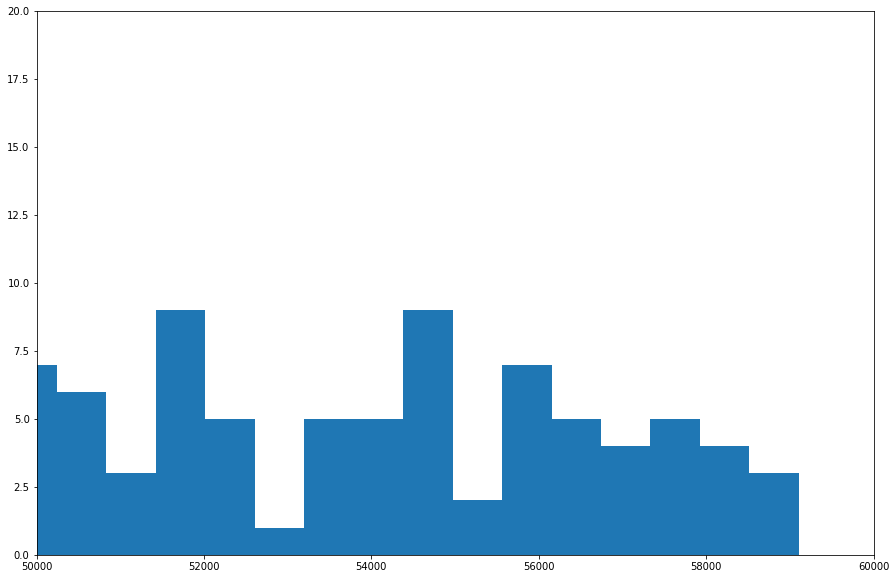

In [65]:
plt.figure(figsize=(15,10)) 
plt.hist(result['rank'], bins = 100)
plt.xlim(50000,60000)
plt.ylim(0,20)
plt.show()

In [71]:
import pickle

In [82]:
users_availability = []
with (open("/Users/esmondchu/Dropbox/UC_Davis/STAT/STA160Spring18/160-Stackoverflow-Data/train_test/engineered_features/user_availibility_network.p", "rb")) as openfile:
    while True:
        try:
            users_availability.append(pickle.load(openfile))
        except EOFError:
            break

In [135]:
users_availability

[{22: {0: 0.1111111111111111,
   3: 0.1111111111111111,
   13: 0.2222222222222222,
   14: 0.2222222222222222,
   15: 0.1111111111111111,
   17: 0.1111111111111111,
   22: 0.1111111111111111},
  77: {15: 1.0},
  85: {7: 1.0},
  91: {1: 0.4, 2: 0.2, 17: 0.2, 23: 0.2},
  118: {21: 1.0},
  169: {15: 1.0},
  214: {12: 1.0},
  235: {4: 0.5, 18: 0.5},
  246: {6: 1.0},
  260: {9: 1.0},
  268: {12: 0.6666666666666666, 16: 0.3333333333333333},
  274: {10: 0.25, 13: 0.25, 14: 0.25, 18: 0.25},
  287: {10: 0.5, 13: 0.5},
  292: {20: 1.0},
  304: {8: 0.08333333333333333,
   9: 0.16666666666666666,
   10: 0.20833333333333334,
   11: 0.0625,
   12: 0.0625,
   13: 0.0625,
   14: 0.041666666666666664,
   15: 0.041666666666666664,
   16: 0.10416666666666667,
   19: 0.020833333333333332,
   20: 0.041666666666666664,
   21: 0.08333333333333333,
   23: 0.020833333333333332},
  356: {3: 1.0},
  361: {1: 1.0},
  364: {0: 0.5, 23: 0.5},
  369: {12: 1.0},
  422: {2: 1.0},
  426: {14: 1.0},
  431: {11: 0.25, 12: